Workshop 5

In [4]:
import sys
print(sys.executable)

c:\Users\User\AppData\Local\Programs\Python\Python314\python.exe


In [5]:
import os
print(os.listdir())

['Workshop5.ipynb', 'workshop_km.csv']


Missing Values

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster

import warnings
warnings.filterwarnings("ignore")


# โหลดData


df = pd.read_csv("workshop_km.csv", encoding="latin1", header=None)


print("Shape:", df.shape)
df.columns = ["date", "query", "user", "text"]
df.head()

Shape: (1048576, 4)


,date,query,user,text
0,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
#missing values
print("Missing values:\n")
print(df.isnull().sum())

#missing text
df = df.dropna(subset=["text"])

#duplicate
print("\nDuplicate rows:", df.duplicated().sum())

# Sample data
df = df.sample(10000, random_state=42)

print("\nNew shape after sampling:", df.shape)

Missing values:

date     0
query    0
user     0
text     0
dtype: int64

Duplicate rows: 644

New shape after sampling: (10000, 4)


Step 2

count    10000.000000
mean        75.267700
std         37.001083
min          8.000000
25%         44.000000
50%         71.000000
75%        106.000000
max        167.000000
Name: text_length, dtype: float64


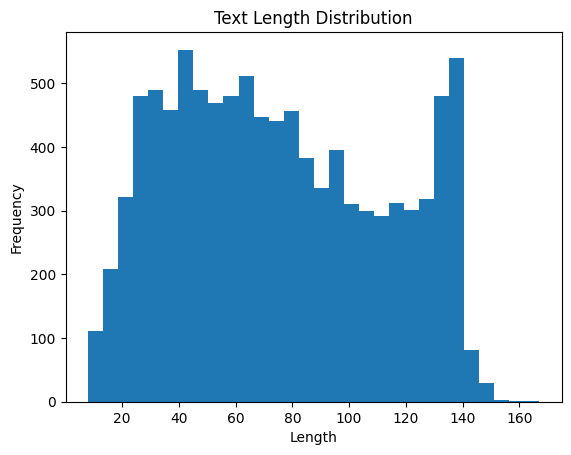


Top 10 most common words:
[('to', 3706), ('I', 3504), ('the', 3122), ('a', 2188), ('my', 1937), ('i', 1853), ('and', 1785), ('is', 1398), ('in', 1341), ('for', 1257)]


In [ ]:
# Text
df["text_length"] = df["text"].apply(len)

#stat
print(df["text_length"].describe())

#Plot distribution
plt.figure()
plt.hist(df["text_length"], bins=30)
plt.title("Text Length Distribution")
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.show()

#frequent words (simple)
from collections import Counter
all_words = " ".join(df["text"]).split()
word_counts = Counter(all_words)

print("\nTop 10 most common words:")
print(word_counts.most_common(10))

Step 3-4

In [9]:
vectorizer = TfidfVectorizer(max_features=1000, stop_words="english")
X = vectorizer.fit_transform(df["text"])

print("TF-IDF shape:", X.shape)

TF-IDF shape: (10000, 1000)


In [10]:
scaler = StandardScaler(with_mean=False)
X_scaled = scaler.fit_transform(X)

Step 5

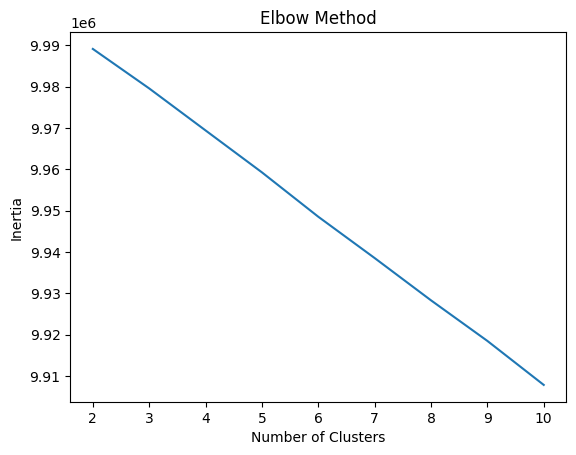

In [ ]:
inertia = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Elbow
plt.figure()
plt.plot(K_range, inertia)
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()


Step 6

In [12]:
k_optimal = 4

kmeans = KMeans(n_clusters=k_optimal, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df["kmeans_cluster"] = clusters

print("Silhouette Score:", silhouette_score(X_scaled, clusters))
df.head()

Silhouette Score: 0.019492163598921985


,date,query,user,text,text_length,kmeans_cluster
462211,Sun Jun 14 22:58:27 PDT 2009,NO_QUERY,ausher8,@bored369 they would too go bad... eventually ...,107,0
906600,Mon May 04 06:13:48 PDT 2009,NO_QUERY,jennygirl7,@mynameismo Good Morning - here's hoping it's ...,65,0
953710,Sun May 17 02:31:10 PDT 2009,NO_QUERY,skrobertson,doing my makeup and stuffs. gonna be a good d...,52,0
777548,Wed Jun 24 22:38:00 PDT 2009,NO_QUERY,SunshineeDani,crying myself to sleep i really really really...,61,0
644707,Fri Jun 19 02:50:47 PDT 2009,NO_QUERY,squidge,getting hungry :-S why? it is just 10.50am ......,56,0


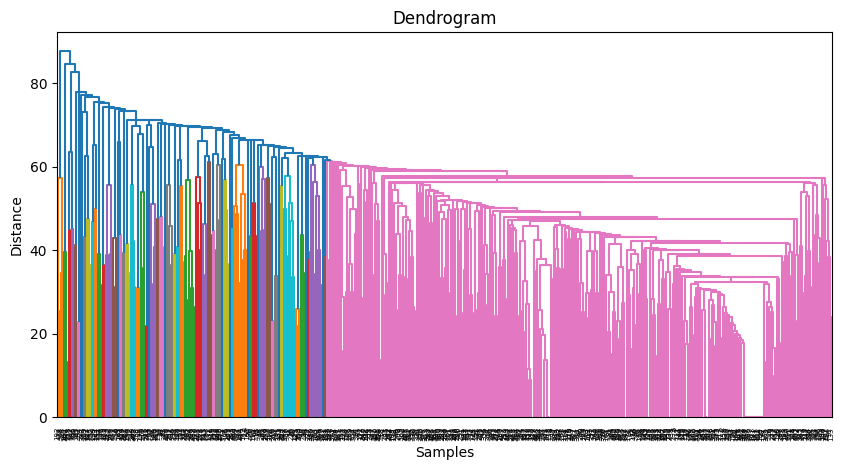

In [ ]:
#smaller subset
X_small = X_scaled[:500].toarray()

Z = linkage(X_small, method="ward")

plt.figure(figsize=(10,5))
dendrogram(Z)
plt.title("Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

In [14]:
hier_clusters = fcluster(Z, t=4, criterion="maxclust")
print("Hierarchical cluster labels:", np.unique(hier_clusters))

Hierarchical cluster labels: [1 2 3 4]


Step 6
findings:
- checked missing values, very few missing entries in the dataset. These were removed before analysis. (used text length to check for outliers)
- The dataset contains a large number of tweets.
- Before applying clustering, scaled the TF-IDF features using StandardScaler
- applied K-Means clustering and Hierarchical clustering (K-Means divides data into fixed number of clusters.
Hierarchical clustering shows how clusters are related in tree form)
- found the optimal number of clusters by observing where inertia starts to decrease slowly
- ovr clustering results show that tweets can be grouped based on text similarity.